# Predicting Heart Disease Using Logistic Regression, KNeighbors, and Random Forest Classifiers

## Understanding the data

In [32]:
# importing basic libraries for data visualization and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
# loading the dataset
df = pd.read_csv('heart.csv-2.xls')

In [34]:
df.head() # show the first 5 rows in our data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [35]:
df.tail() # show the last 5 rows in our data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [36]:
df.shape # show the dimensions of our data

(1025, 14)

In [37]:
df.describe().T # show statistics (mean, std, etc.) for our data

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


## Exploring the data

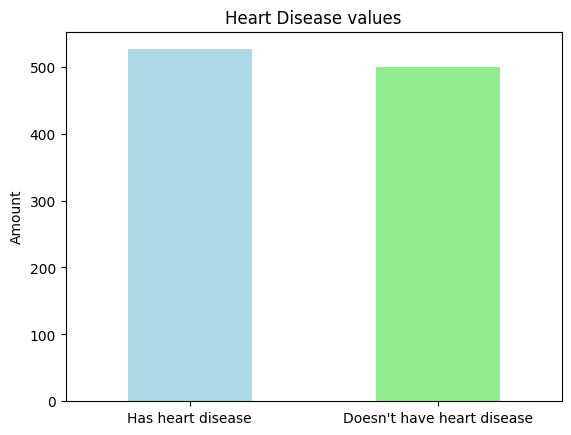

In [38]:
# bar chart of heart disease counts
fig = df.target.value_counts().plot(kind = 'bar', color=["lightblue", 'lightgreen'])
fig.set_xticklabels(labels=['Has heart disease', "Doesn't have heart disease"], rotation=0);
plt.title("Heart Disease values")
plt.ylabel("Amount");

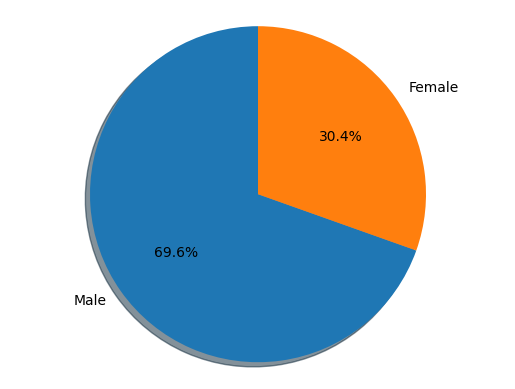

In [40]:
# pie chart of heart disease proportion for male vs. female
labels = 'Male', 'Female'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(df.sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

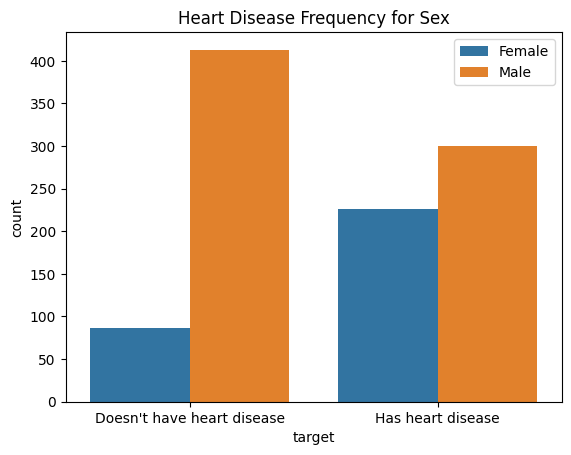

In [41]:
# bar chart of heart disease frequency for male vs. female
fig = sns.countplot(x = 'target', data = df, hue = 'sex')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

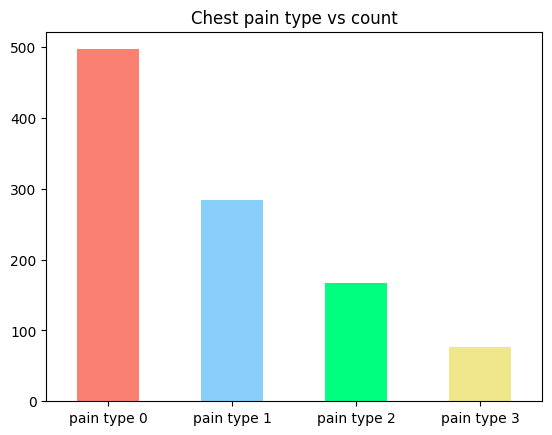

In [42]:
# bar chart showing counts of each chest pain type
fig = df.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)

plt.title('Chest pain type vs count');

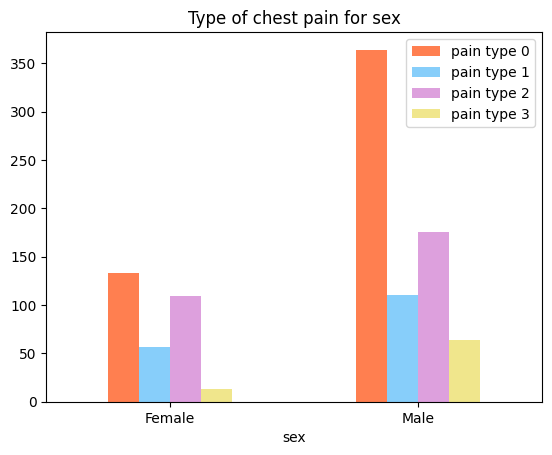

In [43]:
# bar chart showing counts of each chest pain type for male vs. female
fig = pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex')
fig.set_xticklabels(labels=['Female', 'Male'], rotation=0)
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);

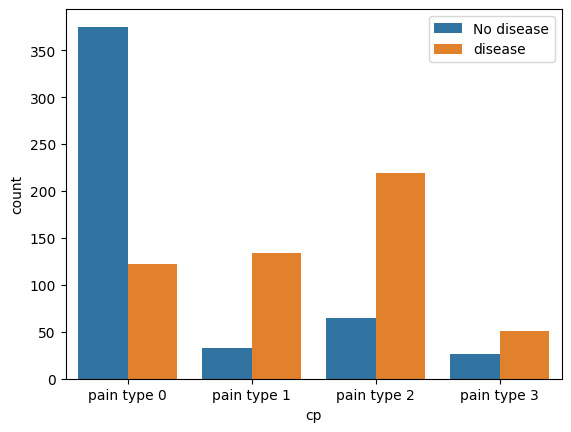

In [44]:
# bar chart showing counts of each chest pain type for people with heart disease vs. those without
fig = sns.countplot(x = 'cp', data = df, hue = 'target')
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['No disease', 'disease']);

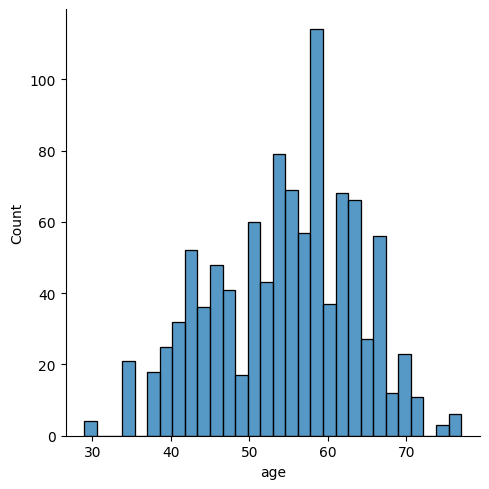

In [47]:
# distribution of people's age in our dataset
sns.displot( x = 'age', data = df, bins = 30)
plt.show();

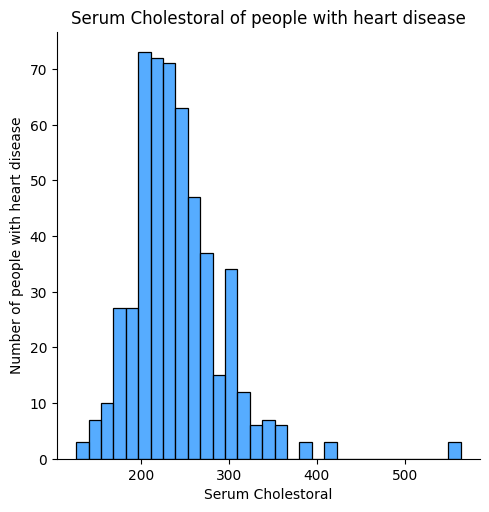

In [49]:
# Distribution of cholestoral levels for those with heart disease
sns.displot(x = df.chol[df.target==1], data = df, color= 'dodgerblue')
plt.title("Serum Cholestoral of people with heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people with heart disease");

## Preparing the data and modeling

In [ ]:
#checking for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [53]:
# creating dataframes for the features and labels, with the labels being whether or not that person has heart disease
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [54]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [55]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [78]:
# spltting the dataset into train and test set (80/20 split)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [79]:
len(x_train), len(x_test), len(y_train), len(y_test)

(820, 205, 820, 205)

In [80]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
469,67,1,0,160,286,0,0,108,1,1.5,1,3,2
553,53,1,2,130,197,1,0,152,0,1.2,0,0,2
21,67,0,0,106,223,0,1,142,0,0.3,2,2,2
259,66,1,0,120,302,0,0,151,0,0.4,1,0,2
41,54,1,2,120,258,0,0,147,0,0.4,1,0,3


In [81]:
y_train.head()

469    0
553    1
21     1
259    1
41     1
Name: target, dtype: int64

In [82]:
from sklearn import metrics

we'll be using f1 scores to evaluate our models, which capture how many correct predictions we achieve, combining the precision and recall scores

### Logistic Regression

Parameters:
* Setting the norm of the penalty `penalty` to be 'l2', which will help us curb overfitting by reducing the weight coefficients
* Setting the inverse of regularization strength `C` to be 0.05, which will also help reduce overfitting
* Setting the optimization algorithm `solver` to 'liblinear' which works well on smaller datasets
* Setting the maximum number of iterations taken for the solvers to converge `max_iter` to 1000

In [83]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear', C=0.05)
log_clf.fit(x_train, y_train)
log_score = metrics.f1_score(y_test, log_clf.predict(x_test))
log_score

0.8165137614678899

### KNeighbors

Parameters:
* Setting the computing algorithm `algorithm` to be 'auto' so that sklearn can attempt to find the best algorithm for us given our data
* Setting the leaf size `leaf_size`, used by certain computing algorithms, to 45. This value can be tweaked and affects the speed of the construction and query, as well as the memory required to store the tree
* Setting the number of neighbors to use for classification `n_neighbors` to 2
* Setting the power parameter `p` to 1, which means we'll be using manhattan distance in our computation

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(algorithm='auto', leaf_size=45, n_neighbors=2, p=1)
knn_clf.fit(x_train, y_train)
knn_score = metrics.f1_score(y_test, knn_clf.predict(x_test))
knn_score

0.8877551020408163

### Random Forest

Paremeters:
* Setting the number of estimators `n_estimators` (the number of trees in the forest) to 100

In [85]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(n_estimators=100)
rand_clf.fit(x_train, y_train)
ranf_score = metrics.f1_score(y_test, rand_clf.predict(x_test))
ranf_score

0.970873786407767

In [86]:
# create a dictionary with all f1 scores
score = [{'Model':'Logistic Regression', 'Score': log_score},
         {'Model':'KNN', 'Score': knn_score},
         {'Model':'Random Forest', 'Score': ranf_score}]

In [87]:
pd.DataFrame(score, columns=['Model','Score'])

,Model,Score
0,Logistic Regression,0.816514
1,KNN,0.887755
2,Random Forest,0.970874


As we can see, the Random Forest Classifier was our best model, achieving an almost perfect f1 score of over 97% on our test dataset, indicating excellent precision and recall.

## Evaluation

In [88]:
# Making preidctions on test set using the Random Forest Classifier
y_preds = rand_clf.predict(x_test)

In [89]:
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       102
           1       0.97      0.97      0.97       103

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

